In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

In [21]:
df = pd.read_csv('../data/vancouver_real_estate.csv', index_col = 0)
df.reset_index(inplace=True)
df.drop(['level_0', 'index'], axis=1, inplace=True)
df = df.drop_duplicates()


In [40]:

# Convert empty strings and None to NaN
df.replace(r'^\s*$', np.nan, regex=True, inplace=True)

# Convert price to float
df["price"] = df["price"].replace(r"[\$,]", "", regex=True).astype("float32")

# Convert bed to integer (using Int64 which supports NaN)
df["bed"] = df["bed"].astype(str).str.extract(r"(\d+)").astype("Int32")

# Convert bath to float (supports half baths)
df["bath"] = df["bath"].astype(str).str.extract(r"(\d+\.?\d*)").astype("float32")

# Convert sqr_footage to float, handling missing values properly
df["sqr_footage"] = (
    df["sqr_footage"]
    .astype(str)
    .str.replace(",", "", regex=True)
    .str.extract(r"(\d+)")
    .astype("float32")
)



In [41]:
df.head()

,address,zip_code,price,bed,bath,sqr_footage,property_link
0,4091 W 34th Ave,V6N 2L6,2788000.0,5,2.0,1653.0,https://www.redfin.com/bc/vancouver/4091-W-34t...
1,4067 W 37th Ave,V6N 2W6,4800000.0,6,4.0,4189.0,https://www.redfin.com/bc/vancouver/4067-W-37t...
2,4056 W 36th Ave,V6N 2S9,6750000.0,4,3.0,3837.0,https://www.redfin.com/bc/vancouver/4056-W-36t...
3,3968 W 23rd Ave,V6S 1L2,3388000.0,4,3.5,2359.0,https://www.redfin.com/bc/vancouver/3968-W-23r...
4,4022 W 30th Ave,V6S 1X5,6590000.0,5,5.5,4190.0,https://www.redfin.com/bc/vancouver/4022-W-30t...


In [43]:
df.describe()

,price,bed,bath,sqr_footage
count,3604.00,3573.0,3553.000000,3582.000000
mean,2299470.25,3.132382,2.516043,1793.439453
std,2590899.00,2.003663,1.542755,1569.485718
min,54000.00,0.0,0.500000,70.000000
25%,882916.00,2.0,1.500000,828.000000
50%,1599900.00,3.0,2.000000,1340.000000
75%,2699000.00,4.0,3.000000,2229.000000
max,49800000.00,14.0,11.000000,26002.000000


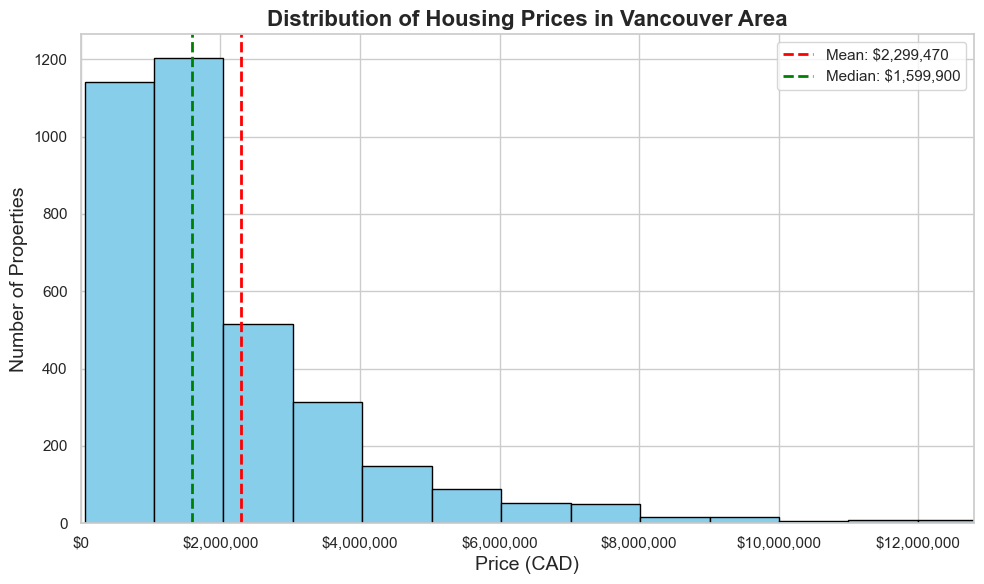

In [44]:
# Set seaborn style for cleaner visuals
sns.set(style="whitegrid")

# Drop NA and define price data
price_data = df["price"].dropna()

# Plot histogram
plt.figure(figsize=(10, 6))
plt.hist(price_data, bins=50, color='skyblue', edgecolor='black')

# Titles and labels
plt.title("Distribution of Housing Prices in Vancouver Area", fontsize=16, fontweight='bold')
plt.xlabel("Price (CAD)", fontsize=14)
plt.ylabel("Number of Properties", fontsize=14)

# Format x-axis with thousands separator
import matplotlib.ticker as ticker
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'${int(x):,}'))

# Add vertical lines for key statistics
mean_price = price_data.mean()
median_price = price_data.median()

plt.axvline(mean_price, color='red', linestyle='--', linewidth=2, label=f'Mean: ${mean_price:,.0f}')
plt.axvline(median_price, color='green', linestyle='--', linewidth=2, label=f'Median: ${median_price:,.0f}')

# Show legend
plt.legend()

# Optional: Adjust x-limits if there's a long tail
plt.xlim(0, price_data.quantile(0.99))  # Focus on the bulk of distribution

plt.tight_layout()
plt.show()


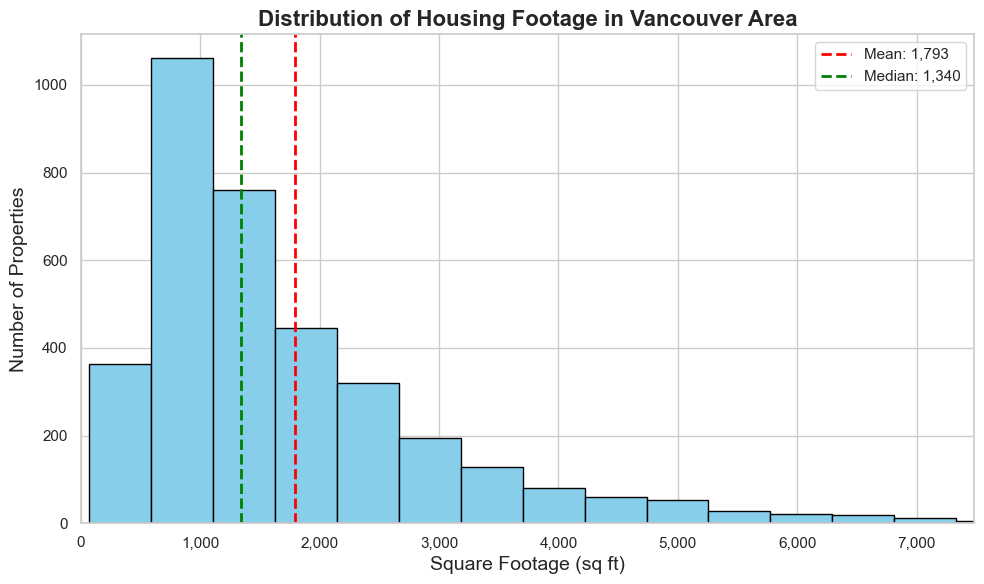

In [52]:
# Set seaborn style for cleaner visuals
sns.set(style="whitegrid")

# Drop NA and define price data
footage_data = df["sqr_footage"].dropna()

# Plot histogram
plt.figure(figsize=(10, 6))
plt.hist(footage_data, bins=50, color='skyblue', edgecolor='black')

# Titles and labels
plt.title("Distribution of Housing Footage in Vancouver Area", fontsize=16, fontweight='bold')
plt.xlabel("Square Footage (sq ft)", fontsize=14)
plt.ylabel("Number of Properties", fontsize=14)

# Format x-axis with thousands separator
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{int(x):,}'))

# Add vertical lines for key statistics
mean_footage = footage_data.mean()
median_footage = footage_data.median()

plt.axvline(mean_footage, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean_footage:,.0f}')
plt.axvline(median_footage, color='green', linestyle='--', linewidth=2, label=f'Median: {median_footage:,.0f}')

# Show legend
plt.legend()

# Optional: Adjust x-limits if there's a long tail
plt.xlim(0, footage_data.quantile(0.99))  # Focus on the bulk of distribution

plt.tight_layout()
plt.show()


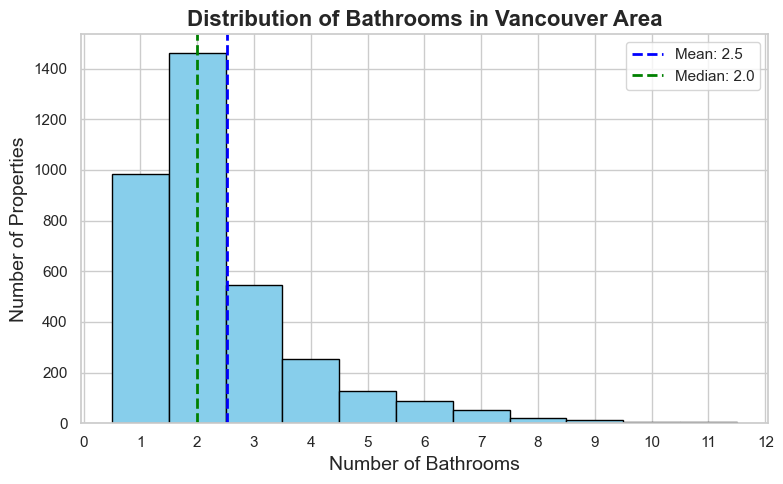

In [54]:
plt.figure(figsize=(8, 5))
sns.set(style="whitegrid")

# Plot histogram for number of bathrooms
bath_data = df["bath"].dropna()
plt.hist(bath_data, bins=range(1, int(bath_data.max()) + 2), color='skyblue', edgecolor='black', align='left')

# Titles and labels
plt.title("Distribution of Bathrooms in Vancouver Area", fontsize=16, fontweight='bold')
plt.xlabel("Number of Bathrooms", fontsize=14)
plt.ylabel("Number of Properties", fontsize=14)

# Add vertical lines for mean and median
mean_bath = bath_data.mean()
median_bath = bath_data.median()
plt.axvline(mean_bath, color='blue', linestyle='--', linewidth=2, label=f'Mean: {mean_bath:.1f}')
plt.axvline(median_bath, color='green', linestyle='--', linewidth=2, label=f'Median: {median_bath:.1f}')

plt.xticks(range(0, int(bath_data.max()) + 2))
plt.legend()
plt.tight_layout()
plt.show()


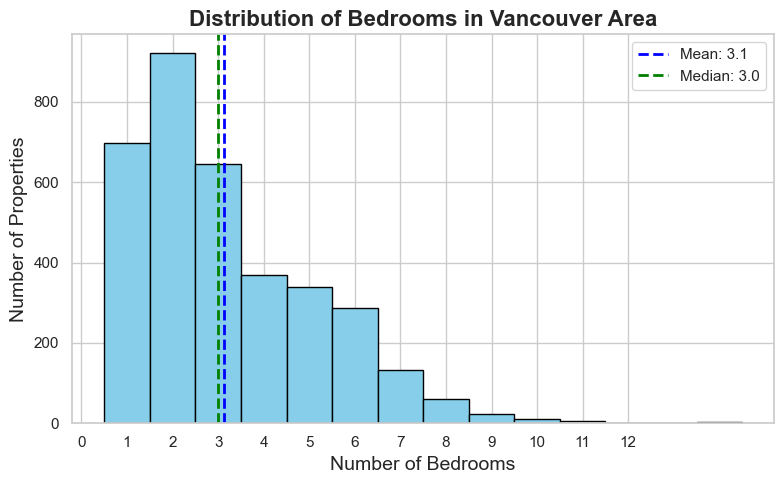

In [55]:
plt.figure(figsize=(8, 5))
sns.set(style="whitegrid")

# Plot histogram for number of bathrooms
bed_data = df["bed"].dropna()
plt.hist(bed_data, bins=range(1, int(bed_data.max()) + 2), color='skyblue', edgecolor='black', align='left')

# Titles and labels
plt.title("Distribution of Bedrooms in Vancouver Area", fontsize=16, fontweight='bold')
plt.xlabel("Number of Bedrooms", fontsize=14)
plt.ylabel("Number of Properties", fontsize=14)

# Add vertical lines for mean and median
mean_bed = bed_data.mean()
median_bed = bed_data.median()
plt.axvline(mean_bed, color='blue', linestyle='--', linewidth=2, label=f'Mean: {mean_bed:.1f}')
plt.axvline(median_bed, color='green', linestyle='--', linewidth=2, label=f'Median: {median_bed:.1f}')

plt.xticks(range(0, int(bath_data.max()) + 2))
plt.legend()
plt.tight_layout()
plt.show()


In [57]:
# Further examination of price distribution by zip code

zip_summary = df.groupby("zip_code").agg(
    num_properties=("price", "count"),
    mean_price=("price", "mean"),
    median_price=("price", "median"),
    mean_sqft=("sqr_footage", "mean"),
    median_sqft=("sqr_footage", "median")
).reset_index()

# Optionally: format large numbers for readability
zip_summary["mean_price"] = zip_summary["mean_price"].round(0)
zip_summary["median_price"] = zip_summary["median_price"].round(0)
zip_summary["mean_sqft"] = zip_summary["mean_sqft"].round(0)
zip_summary["median_sqft"] = zip_summary["median_sqft"].round(0)

# Display the summary
zip_summary


,zip_code,num_properties,mean_price,median_price,mean_sqft,median_sqft
0,V0V 0V0,46,1302796.0,1124900.0,965.0,859.0
1,V3B 2P5,1,6360000.0,6360000.0,4465.0,4465.0
2,V5C 0N7,1,899999.0,899999.0,760.0,760.0
3,V5C 1A6,1,2495000.0,2495000.0,3497.0,3497.0
4,V5G 2C4,1,2190000.0,2190000.0,2365.0,2365.0
...,...,...,...,...,...,...
2054,V7V 1Z3,1,5000000.0,5000000.0,10048.0,10048.0
2055,V7W 2P8,1,1298000.0,1298000.0,1185.0,1185.0
2056,V8K 1P2,1,769000.0,769000.0,1245.0,1245.0
2057,Z5Z 0K7,1,1149900.0,1149900.0,595.0,595.0
